# Copyright

<PRE>
Copyright (c) 2021 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>

# Author classification
The task is to train a 1D CNN or an LSTM that is able to  classify text from two authors. The final model should be able to tell about a text with a given length (e.g. 60 characters) who wrote it. 

Please write the codes according to the following parts:

## Python module imports
Import all Python modules that you would need during the Assignment.

In [83]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import one_hot

## Data acquisition
Seek a possible dataset, you can use any source, e.g.
* http://www.gutenberg.org/
* https://www.kaggle.com/datasets
* https://paperswithcode.com/datasets
* if you would like to learn Hungarian, than e.g. https://mek.oszk.hu/

You can download the text by hand (e.g. by copy-pasting some parts into txt files) or with Python. 

In [84]:
def letter_arr(s):
  res = ""
  for ch in s:
      if ch.isalpha():
          res += ch
  return res

In [85]:
with open('../content/anna_karenina.txt', 'r') as f:
    anna_karenina = f.read()
with open('../content/pride_and_prejudice.txt', 'r') as f:
    pride_and_prejudice = f.read()
ak = list(letter_arr(anna_karenina))
pp = list(letter_arr(pride_and_prejudice))
print(ak[:100])
print(pp[:100])

['E', 'v', 'e', 'r', 'y', 't', 'h', 'i', 'n', 'g', 'w', 'a', 's', 'i', 'n', 'c', 'o', 'n', 'f', 'u', 's', 'i', 'o', 'n', 'i', 'n', 't', 'h', 'e', 'O', 'b', 'l', 'o', 'n', 's', 'k', 'y', 's', 'h', 'o', 'u', 's', 'e', 'T', 'h', 'e', 'w', 'i', 'f', 'e', 'h', 'a', 'd', 'd', 'i', 's', 'c', 'o', 'v', 'e', 'r', 'e', 'd', 't', 'h', 'a', 't', 't', 'h', 'e', 'h', 'u', 's', 'b', 'a', 'n', 'd', 'w', 'a', 's', 'c', 'a', 'r', 'r', 'y', 'i', 'n', 'g', 'o', 'n', 'a', 'n', 'i', 'n', 't', 'r', 'i', 'g', 'u', 'e']
['I', 't', 'i', 's', 'a', 't', 'r', 'u', 't', 'h', 'u', 'n', 'i', 'v', 'e', 'r', 's', 'a', 'l', 'l', 'y', 'a', 'c', 'k', 'n', 'o', 'w', 'l', 'e', 'd', 'g', 'e', 'd', 't', 'h', 'a', 't', 'a', 's', 'i', 'n', 'g', 'l', 'e', 'm', 'a', 'n', 'i', 'n', 'p', 'o', 's', 's', 'e', 's', 's', 'i', 'o', 'n', 'o', 'f', 'a', 'g', 'o', 'o', 'd', 'f', 'o', 'r', 't', 'u', 'n', 'e', 'm', 'u', 's', 't', 'b', 'e', 'i', 'n', 'w', 'a', 'n', 't', 'o', 'f', 'a', 'w', 'i', 'f', 'e', 'H', 'o', 'w', 'e', 'v', 'e', 'r', 'l'

In [86]:
def make_lower(char_array):
  lower_char_array = np.array(char_array)
  for i in range(len(char_array)):
    lower_char_array[i] = char_array[i].lower()
  return lower_char_array

In [87]:
ak = make_lower(ak)
pp = make_lower(pp)

print(ak[:100])
print(pp[:100])

['e' 'v' 'e' 'r' 'y' 't' 'h' 'i' 'n' 'g' 'w' 'a' 's' 'i' 'n' 'c' 'o' 'n'
 'f' 'u' 's' 'i' 'o' 'n' 'i' 'n' 't' 'h' 'e' 'o' 'b' 'l' 'o' 'n' 's' 'k'
 'y' 's' 'h' 'o' 'u' 's' 'e' 't' 'h' 'e' 'w' 'i' 'f' 'e' 'h' 'a' 'd' 'd'
 'i' 's' 'c' 'o' 'v' 'e' 'r' 'e' 'd' 't' 'h' 'a' 't' 't' 'h' 'e' 'h' 'u'
 's' 'b' 'a' 'n' 'd' 'w' 'a' 's' 'c' 'a' 'r' 'r' 'y' 'i' 'n' 'g' 'o' 'n'
 'a' 'n' 'i' 'n' 't' 'r' 'i' 'g' 'u' 'e']
['i' 't' 'i' 's' 'a' 't' 'r' 'u' 't' 'h' 'u' 'n' 'i' 'v' 'e' 'r' 's' 'a'
 'l' 'l' 'y' 'a' 'c' 'k' 'n' 'o' 'w' 'l' 'e' 'd' 'g' 'e' 'd' 't' 'h' 'a'
 't' 'a' 's' 'i' 'n' 'g' 'l' 'e' 'm' 'a' 'n' 'i' 'n' 'p' 'o' 's' 's' 'e'
 's' 's' 'i' 'o' 'n' 'o' 'f' 'a' 'g' 'o' 'o' 'd' 'f' 'o' 'r' 't' 'u' 'n'
 'e' 'm' 'u' 's' 't' 'b' 'e' 'i' 'n' 'w' 'a' 'n' 't' 'o' 'f' 'a' 'w' 'i'
 'f' 'e' 'h' 'o' 'w' 'e' 'v' 'e' 'r' 'l']


## Data analysis
Count the number of characters from both authors and display them on a plot (e.g. Seaborn's countplot).

In [88]:
def count_letters(arr, arr_c):
  for c in arr:
    if c == 'a' or c == 'A':
      arr_c[0] += 1
    elif c == 'b' or c == 'B':
      arr_c[1] += 1
    elif c == 'c' or c == 'C':
      arr_c[2] += 1
    elif c == 'd' or c == 'D':
      arr_c[3] += 1
    elif c == 'e' or c == 'E':
      arr_c[4] += 1
    elif c == 'f' or c == 'F':
      arr_c[5] += 1
    elif c == 'g' or c == 'G':
      arr_c[6] += 1
    elif c == 'h' or c == 'H':
      arr_c[7] += 1
    elif c == 'i' or c == 'I':
      arr_c[8] += 1
    elif c == 'j' or c == 'J':
      arr_c[9] += 1
    elif c == 'k' or c == 'K':
      arr_c[10] += 1
    elif c == 'l' or c == 'L':
      arr_c[11] += 1
    elif c == 'm' or c == 'M':
      arr_c[12] += 1
    elif c == 'n' or c == 'N':
      arr_c[13] += 1
    elif c == 'o' or c == 'O':
      arr_c[14] += 1
    elif c == 'p' or c == 'P':
      arr_c[15] += 1
    elif c == 'q' or c == 'Q':
      arr_c[16] += 1
    elif c == 'r' or c == 'R':
      arr_c[17] += 1
    elif c == 's' or c == 'S':
      arr_c[18] += 1
    elif c == 't' or c == 'T':
      arr_c[19] += 1
    elif c == 'u' or c == 'U':
      arr_c[20] += 1
    elif c == 'v' or c == 'V':
      arr_c[21] += 1
    elif c == 'w' or c == 'W':
      arr_c[22] += 1
    elif c == 'x' or c == 'X':
      arr_c[23] += 1
    elif c == 'y' or c == 'Y':
      arr_c[24] += 1
    elif c == 'z' or c == 'Z':
      arr_c[25] += 1
  return arr_c

In [89]:
ak_c = np.zeros(26)
ak_c = count_letters(ak, ak_c)
pp_c = np.zeros(26)
pp_c = count_letters(pp, pp_c)
print(ak_c)
print(pp_c)

[124073.  21228.  34136.  68465. 185313.  31120.  33241. 106442. 109112.
   1420.  15400.  60609.  34167. 110264. 113836.  23715.   1410.  79598.
  97867. 140478.  39621.  19951.  37022.   3396.  32034.   1042.]
[41780.  9103. 13495. 22330. 69519. 12029. 10043. 34123. 37965.   876.
  3210. 21625. 14773. 37745. 40032.  8244.   627. 32349. 33136. 46707.
 15006.  5774. 12322.   885. 12737.   949.]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


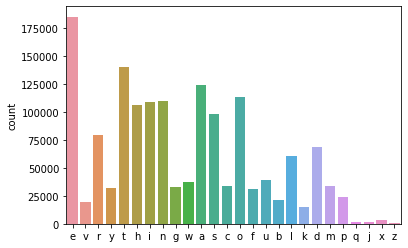

In [90]:
import seaborn as sns
ak_plt = sns.countplot(ak)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


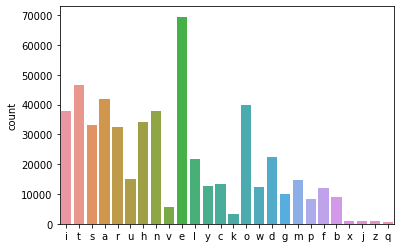

In [91]:
pp_plt = sns.countplot(pp)

## Data loading, labeling and preprocessing
Load the data and convert the characters into one-hot encodings. Then load the data into a 3D NumPy array, with a shape of

* (batch, sequence_length, alphabet_length)

where sequence_length=60, and alphabet_length equals to the number of unique characters in both datasets. The sequences should be cut out from the complete dataset by sliding window. You should add 0 and 1 labels to the sequences, according to the author. 

Later you may change sequence_length to achieve better results!

In [108]:
max_features = 50000
maxlen = 500 
batch_size = 16
embedding_dims = 20 
filters = 12 
kernel_size = 3 
hidden_dims = 8 
epochs = 1000 

sequence_length = 100
alphabet_length = 26
valid_split = 0.2
test_split = 0.2

tolstoy_key = 0
austen_key = 1

In [110]:
def extract_sequences(char_array, author_key):
  sequence_array = list()
  start_indx = 0
  end_indx = sequence_length - 1
  while end_indx < len(char_array):
    sequence = np.array(char_array[start_indx:end_indx + 1])
    sequence_array.append(sequence)
    start_indx += 1
    end_indx += 1
  return np.array(sequence_array)

In [111]:
def encode_char_data(char_array):
  #integer encoding
  alphabet = "abcdefghijklmnopqrstuv"
  int_array = np.zeros(len(char_array))
  for i in range(len(char_array)):
    int_array[i] = alphabet.find(char_array[i])
  encoded_array = to_categorical(int_array, alphabet_length)
  return encoded_array

In [112]:
ak_encoded = encode_char_data(ak)
pp_encoded = encode_char_data(pp)
print(ak_encoded.shape)
print(pp_encoded.shape)

(1524960, 26)
(537384, 26)


In [113]:
#shorten both datasets

ak_encoded = ak_encoded[:max_features]
pp_encoded = pp_encoded[:max_features]

In [114]:
ak_sequences = extract_sequences(ak_encoded, tolstoy_key)
pp_sequences = extract_sequences(pp_encoded, austen_key)
print(ak_sequences.shape)
print(pp_sequences.shape)

(49901, 100, 26)
(49901, 100, 26)


In [115]:
# create y_labels
y = np.zeros(ak_sequences.shape[0] + pp_sequences.shape[0], dtype=np.uint8)
for i in range(int(y.shape[0]/2)):
  y[i] = 1

In [116]:
#combine datasets
#labels 0 - leo tolstoy, 1 - jane austen
X = np.concatenate((ak_sequences, pp_sequences))
print(X.shape)
print(y.shape)

(99802, 100, 26)
(99802,)


## Data splitting
Split the data into train, validate and test sets.

In [117]:
def split_data(X,y,valid_split,test_split):
  #shuffle data
  p = np.random.permutation(len(y))
  X_shuffled=X[p]
  y_shuffled=y[p]
  valid_size = int(X.shape[0]*(1-test_split-valid_split))
  test_size = int(X.shape[0]*(1-test_split))

  X_train, Y_train = X_shuffled[:valid_size], y_shuffled[:valid_size]
  X_valid, Y_valid = X_shuffled[valid_size:test_size], y_shuffled[valid_size:test_size]
  X_test, Y_test   = X_shuffled[test_size:], y_shuffled[test_size:]

  return X_train, Y_train, X_valid, Y_valid, X_test, Y_test

In [118]:
X_train, Y_train, X_valid, Y_valid, X_test, Y_test = split_data(X, y, valid_split, test_split)
print(X_train.shape)
print(Y_train.shape)

print(X_valid.shape)
print(Y_valid.shape)

print(X_test.shape)
print(Y_test.shape)

(59881, 100, 26)
(59881,)
(19960, 100, 26)
(19960,)
(19961, 100, 26)
(19961,)


## Model definition
Define a 1D CNN or an LSTM for the task. Compile the model with the correct loss function.

In [119]:

model = Sequential()


model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 kernel_initializer=HeNormal(),
                 strides=1,
                 input_shape=(sequence_length, alphabet_length,)))
 
model.add(GlobalMaxPooling1D())

model.add(Dense(hidden_dims, kernel_initializer=HeNormal()))
model.add(Dropout(0.5))
model.add(Activation('relu'))

model.add(Dense(1)) 
model.add(Activation('sigmoid')) 

model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [120]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 98, 12)            948       
                                                                 
 global_max_pooling1d_5 (Glo  (None, 12)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_11 (Dense)            (None, 8)                 104       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 activation_10 (Activation)  (None, 8)                 0         
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                      

## Model training
Train the model and apply early stopping.

In [121]:
es = EarlyStopping(patience=5)
model.fit(X_train, Y_train, epochs=500, batch_size=batch_size, 
              validation_data=(X_valid, Y_valid), verbose=2, 
              callbacks=[es])

Epoch 1/500
3743/3743 - 12s - loss: 0.5740 - accuracy: 0.6978 - val_loss: 0.3945 - val_accuracy: 0.8607 - 12s/epoch - 3ms/step
Epoch 2/500
3743/3743 - 12s - loss: 0.4100 - accuracy: 0.8208 - val_loss: 0.2793 - val_accuracy: 0.8989 - 12s/epoch - 3ms/step
Epoch 3/500
3743/3743 - 11s - loss: 0.3495 - accuracy: 0.8522 - val_loss: 0.2234 - val_accuracy: 0.9189 - 11s/epoch - 3ms/step
Epoch 4/500
3743/3743 - 11s - loss: 0.3246 - accuracy: 0.8629 - val_loss: 0.1961 - val_accuracy: 0.9265 - 11s/epoch - 3ms/step
Epoch 5/500
3743/3743 - 11s - loss: 0.3088 - accuracy: 0.8703 - val_loss: 0.2089 - val_accuracy: 0.9149 - 11s/epoch - 3ms/step
Epoch 6/500
3743/3743 - 11s - loss: 0.2930 - accuracy: 0.8788 - val_loss: 0.1700 - val_accuracy: 0.9371 - 11s/epoch - 3ms/step
Epoch 7/500
3743/3743 - 11s - loss: 0.2845 - accuracy: 0.8825 - val_loss: 0.1541 - val_accuracy: 0.9439 - 11s/epoch - 3ms/step
Epoch 8/500
3743/3743 - 12s - loss: 0.2794 - accuracy: 0.8844 - val_loss: 0.1549 - val_accuracy: 0.9432 - 12s/e

## Evaluation on test data
Evaluate the model on the test data in terms of loss and accuracy.

In [122]:
print(model.evaluate(X_test, Y_test))

624/624 [==============================] - 1s 2ms/step - loss: 0.1048 - accuracy: 0.9642
[0.1048157811164856, 0.9642302393913269]


## Confusion matrix
Calculate and display the confusion matrix.

In [123]:
import numpy as np
from sklearn.metrics import confusion_matrix

preds = model.predict(X_test)
y_pred = np.round(preds) 

conf=confusion_matrix(Y_test, y_pred)
print(conf)

[[9711  132]
 [ 582 9536]]


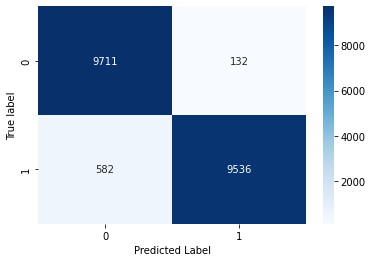

In [124]:
import seaborn as sns
ax = sns.heatmap(conf, annot=True, fmt='d', cmap='Blues') 
ax.set(xlabel='Predicted Label',
       ylabel='True label');